In [ ]:
# %load /Users/Andy/jupyter_templates/jupyter_imports.py
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
%matplotlib inline

# make plots look nice
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['lines.linewidth'] = 3
plt.style.use('ggplot')


# The Monty Hall Problem
Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?

In [58]:
doors = np.array([1,2,3])

# randomly pick a door
first_choice = np.random.choice(doors)
print('first_choice: ' + str(first_choice))

# randomly assign the winning door
winner = np.random.choice(doors)
print('winning door: ' + str(winner))

# host opens one of other doors which doesn't contain the prize
other_two_doors = doors[doors!=first_choice]
print('Other two doors: ' + str(other_two_doors))

# 
if winner in other_two_doors:
    opened_door = other_two_doors[other_two_doors!=winner]
else:
    opened_door = np.random.choice(other_two_doors)
    
print('Monty opens door ' + str(opened_door))

if first_choice==winner:
    print('You win by staying')
else:
    print('You win by switching')


first_choice: 1
winning door: 1
Other two doors: [2 3]
Monty opens door 3
You win by staying


In [59]:
def play_monty(switch_doors):
    '''
    
    '''
    
    doors = np.array([1,2,3])

    # randomly pick a door
    first_choice = np.random.choice(doors)

    # randomly assign the winning door
    winner = np.random.choice(doors)

    # host opens one of other doors which doesn't contain the prize
    other_two_doors = doors[doors!=first_choice]

    if winner in other_two_doors:
        opened_door = other_two_doors[other_two_doors!=winner]
    else:
        opened_door = np.random.choice(other_two_doors)

    if switch_doors:
        second_choice = other_two_doors[other_two_doors!=opened_door]
    else:
        second_choice = first_choice
        
    if second_choice==winner:
        return 1
    else: 
        return 0

In [60]:
N_simulations = 1000
result_no_switch = []
for _ in range(N_simulations):
    result_no_switch.append(play_monty(switch_doors=False))

result_switch = []
for _ in range(N_simulations):
    result_switch.append(play_monty(switch_doors=True))


In [61]:
print(np.sum(result_no_switch))
print(np.sum(result_switch))

341
668


/Users/Andy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/Users/Andy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


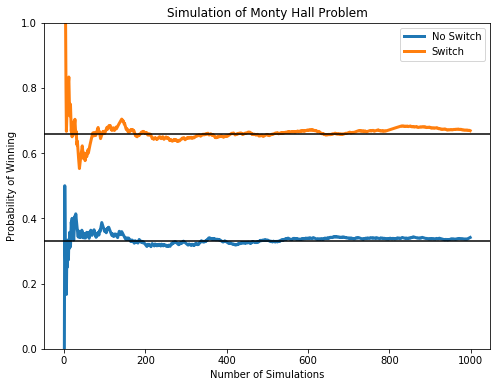

In [67]:
fig, ax = plt.subplots(1, figsize=(8,6))
ax.plot(np.cumsum(result_no_switch) / np.array(list(range(N_simulations))), linewidth=3, label='No Switch')
ax.plot(np.cumsum(result_switch) / np.array(list(range(N_simulations))), linewidth=3, label='Switch')
ax.axhline(0.66, color='black')
ax.axhline(0.33, color='black')
ax.set_ylim(0,1)
ax.legend()
ax.set_xlabel('Number of Simulations')
ax.set_ylabel('Probability of Winning')
ax.set_title('Simulation of Monty Hall Problem')
plt.show()